In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter

/var/folders/6m/1wyk0cv146d91z1nsb6cxh6w0000gn/T/ipykernel_18406/4156326459.py:39: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'csv/final_merged_data/merged_data_{city}.csv')
/var/folders/6m/1wyk0cv146d91z1nsb6cxh6w0000gn/T/ipykernel_18406/4156326459.py:39: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'csv/final_merged_data/merged_data_{city}.csv')
/var/folders/6m/1wyk0cv146d91z1nsb6cxh6w0000gn/T/ipykernel_18406/4156326459.py:39: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'csv/final_merged_data/merged_data_{city}.csv')
/var/folders/6m/1wyk0cv146d91z1nsb6cxh6w0000gn/T/ipykernel_18406/4156326459.py:39: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'csv/final_merged_data/merged_data_{city

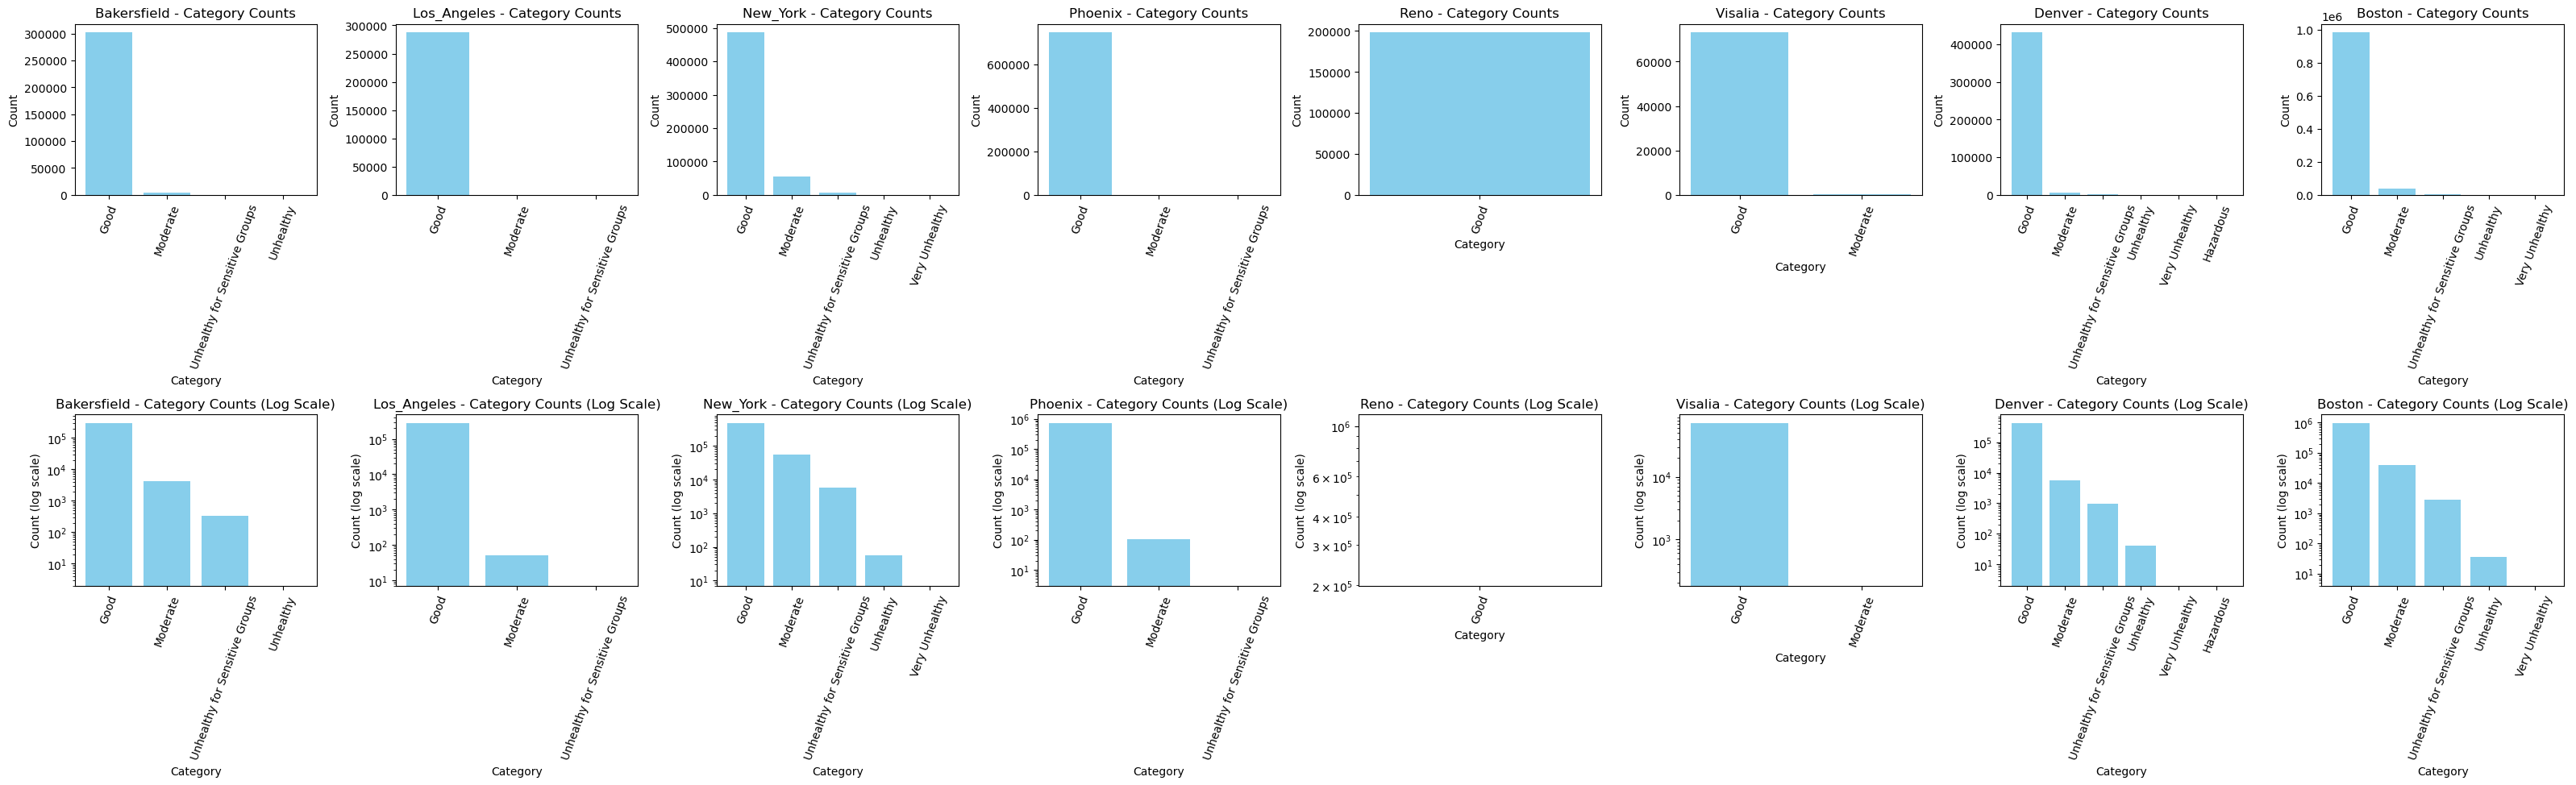

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

def count_unique_values(df, column_name):
    """ Count unique values in a specified column of a DataFrame. """
    if column_name in df.columns:
        unique_counts = df[column_name].value_counts().to_dict()
        return unique_counts
    else:
        return f"Column '{column_name}' not found in DataFrame."

def plot_category_counts(ax, count_dict, title='Category Counts', xlabel='Category', ylabel='Count', log_scale=False):
    """ Plot category counts on a given axis. """
    categories = list(count_dict.keys())
    counts = list(count_dict.values())
    
    ax.bar(categories, counts, color='skyblue')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    if log_scale:
        ax.set_yscale('log')
        ax.set_ylabel(ylabel + ' (log scale)')
        ax.set_ylim(bottom=max(min(counts), 0.1))
    else:
        ax.set_ylabel(ylabel)
    ax.tick_params(axis='x', rotation=70)

# List of cities
cities = ['Bakersfield', 'Los_Angeles', 'New_York', 'Phoenix', 'Reno', 'Visalia', 'Denver', 'Boston']

# Setup figure and axes
fig, axes = plt.subplots(nrows=2, ncols=len(cities), figsize=(4 * len(cities), 10))

# Ensure axes is a 2D array
if len(cities) == 1:
    axes = [axes]

for i, city in enumerate(cities):
    df = pd.read_csv(f'csv/final_merged_data/merged_data_{city}.csv')
    cat_counts = count_unique_values(df, 'aqi_cat')
    
    plot_category_counts(axes[0][i], cat_counts, title=f'{city} - Category Counts', xlabel='Category', ylabel='Count')
    plot_category_counts(axes[1][i], cat_counts, title=f'{city} - Category Counts (Log Scale)', xlabel='Category', ylabel='Count', log_scale=True)

fig.tight_layout()
plt.show()
fig.savefig("./category_counts.png")


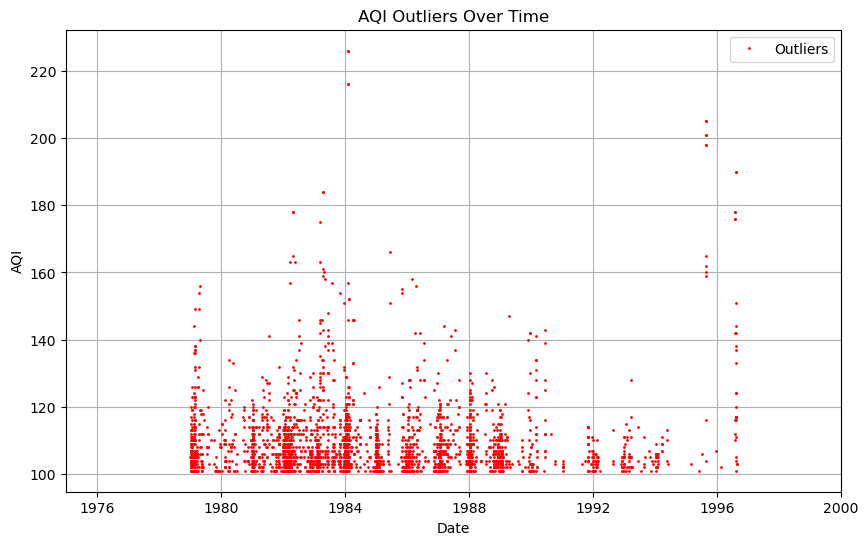

In [4]:
def plot_outliers(file_path):
    dates = []
    aqis = []
    with open(file_path, 'r') as file:
        for line in file:
            date_str, aqi_str = line.split(", ")
            date = pd.to_datetime(date_str.split(": ")[1])
            aqi = float(aqi_str.split(": ")[1])
            dates.append(date)
            aqis.append(aqi)

    df = pd.DataFrame({"Date": dates, "AQI": aqis})
    df['Date'] = df['Date'].dt.date
    df_agg = df.groupby('Date', as_index=False).agg({'AQI': 'mean'})

    #ploting below
    plt.figure(figsize=(10, 6))
    outliers = df[df['AQI'] > 100]
    plt.plot(outliers['Date'], outliers['AQI'], 'ro', label='Outliers', markersize=1)

    plt.xlabel('Date')
    plt.ylabel('AQI')
    plt.title('AQI Outliers Over Time')
    plt.legend()
    plt.grid(True)
    plt.xlim(pd.Timestamp('1975-01-01'), pd.Timestamp('2000-01-01'))

    plt.show()

plot_outliers('models/outlier_dates_aqi.txt')

Top Ten AQI Dates:Date: 1984-02-02 00:00:00, AQI: 226.0
Date: 1984-02-02 00:00:00, AQI: 226.0
Date: 1984-02-02 00:00:00, AQI: 226.0
Date: 1984-02-02 00:00:00, AQI: 226.0
Date: 1984-02-02 00:00:00, AQI: 216.0
Date: 1984-02-02 00:00:00, AQI: 216.0
Date: 1984-02-02 00:00:00, AQI: 216.0
Date: 1984-02-02 00:00:00, AQI: 216.0
Date: 1995-08-29 00:00:00, AQI: 205.0
Date: 1995-08-29 00:00:00, AQI: 205.0


In [6]:
def visualizeFullData(city):
    df = pd.read_csv("csv/air_quality_data_"+ city + ".csv")
    df['date_local'] = pd.to_datetime(df['date_local'])
    plt.figure(figsize=(14, 8))
    plt.xlim(df['date_local'].min(), df['date_local'].max())
    plt.ylim(df['sample_measurement'].min(), df['sample_measurement'].max())
    plt.scatter(df['date_local'], df['sample_measurement'])
    plt.title(city)
    plt.xlabel('Date Local')
    plt.ylabel('Sample Measurement')

    plt.gca().xaxis.set_major_locator(YearLocator(5))
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
    plt.show()

In [5]:
def visualizeRange(city, start_year, end_year):
    df = pd.read_csv("csv/air_quality_data_"+ city + ".csv")
    df['date_local'] = pd.to_datetime(df['date_local'])
    start_year_format = str(start_year) + '-01-01'
    end_year_format = str(end_year) + '-12-31'
    df = df[(df['date_local'] >= start_year_format) & (df['date_local'] <= end_year_format)]

    plt.figure(figsize=(14, 8))
    plt.xlim(df['date_local'].min(), df['date_local'].max())
    plt.ylim(df['sample_measurement'].min(), df['sample_measurement'].max())
    plt.scatter(df['date_local'], df['sample_measurement'])
    plt.title(city)
    plt.xlabel('Date Local')
    plt.ylabel('Sample Measurement')

    plt.gca().xaxis.set_major_locator(YearLocator(1))
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
    plt.show()

Visualizing the Continuous Models Results

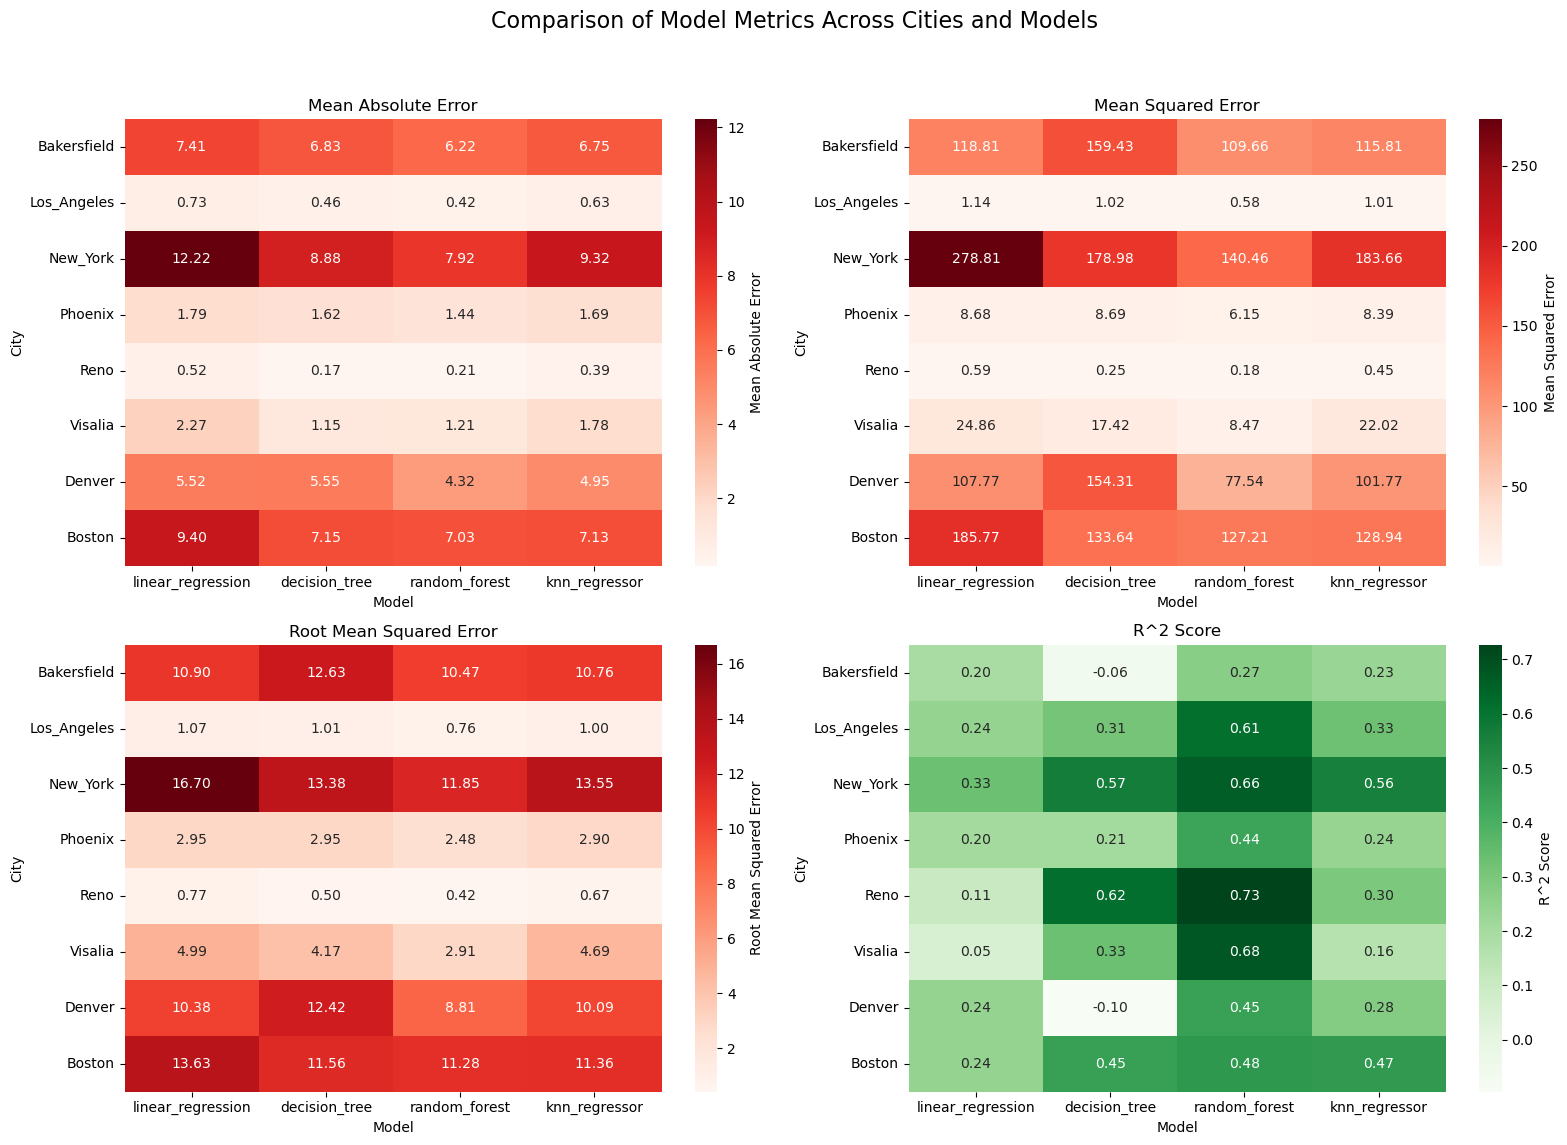

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of cities
cities = ['Bakersfield', 'Los_Angeles', 'New_York', 'Phoenix', 'Reno', 'Visalia', 'Denver', 'Boston']

# List of models
models = ['linear_regression', 'decision_tree', 'random_forest', 'knn_regressor']

# List of metrics
metrics = ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R^2 Score']

# Create a dictionary of DataFrames, one for each metric
metrics_dfs = {metric: pd.DataFrame(index=cities, columns=models) for metric in metrics}

# Function to read a specific metric from a file
def read_metric(file_path, metric_name):
    try:
        with open(file_path, 'r') as file:
            for line in file:
                if metric_name in line:
                    _, value = line.split(':')
                    return float(value.strip())
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except ValueError:
        print(f"Invalid value found in {file_path}")
    return None  # Return None if file not found, error occurs, or metric not found

# Populate the DataFrame with scores for each model in each city
for city in cities:
    for model in models:
        file_path = f'results/{model}/{model}_results_{city}.txt'
        for metric in metrics:
            metrics_dfs[metric].loc[city, model] = read_metric(file_path, metric)

# Convert all entries in DataFrame to numeric types
for metric in metrics:
    metrics_dfs[metric] = metrics_dfs[metric].apply(pd.to_numeric, errors='coerce')

# Define specific colormaps for each metric
colormaps = {
    'R^2 Score': 'Greens',
    'Mean Absolute Error': 'Reds',
    'Mean Squared Error': 'Reds',
    'Root Mean Squared Error': 'Reds'
}

# Plotting all metrics in separate subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
fig.suptitle('Comparison of Model Metrics Across Cities and Models', fontsize=16)

for ax, metric in zip(axes.flatten(), metrics):
    sns.heatmap(metrics_dfs[metric], annot=True, cmap=colormaps[metric], fmt=".2f", ax=ax,
                cbar_kws={'label': metric}, vmax=metrics_dfs[metric].max().max() if 'Error' not in metric else None,
                vmin=metrics_dfs[metric].min().min() if 'Error' not in metric else None)
    ax.set_title(metric)
    ax.set_xlabel('Model')
    ax.set_ylabel('City')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust subplots to fit the figure title
plt.show()


Visualizing the KNN Model

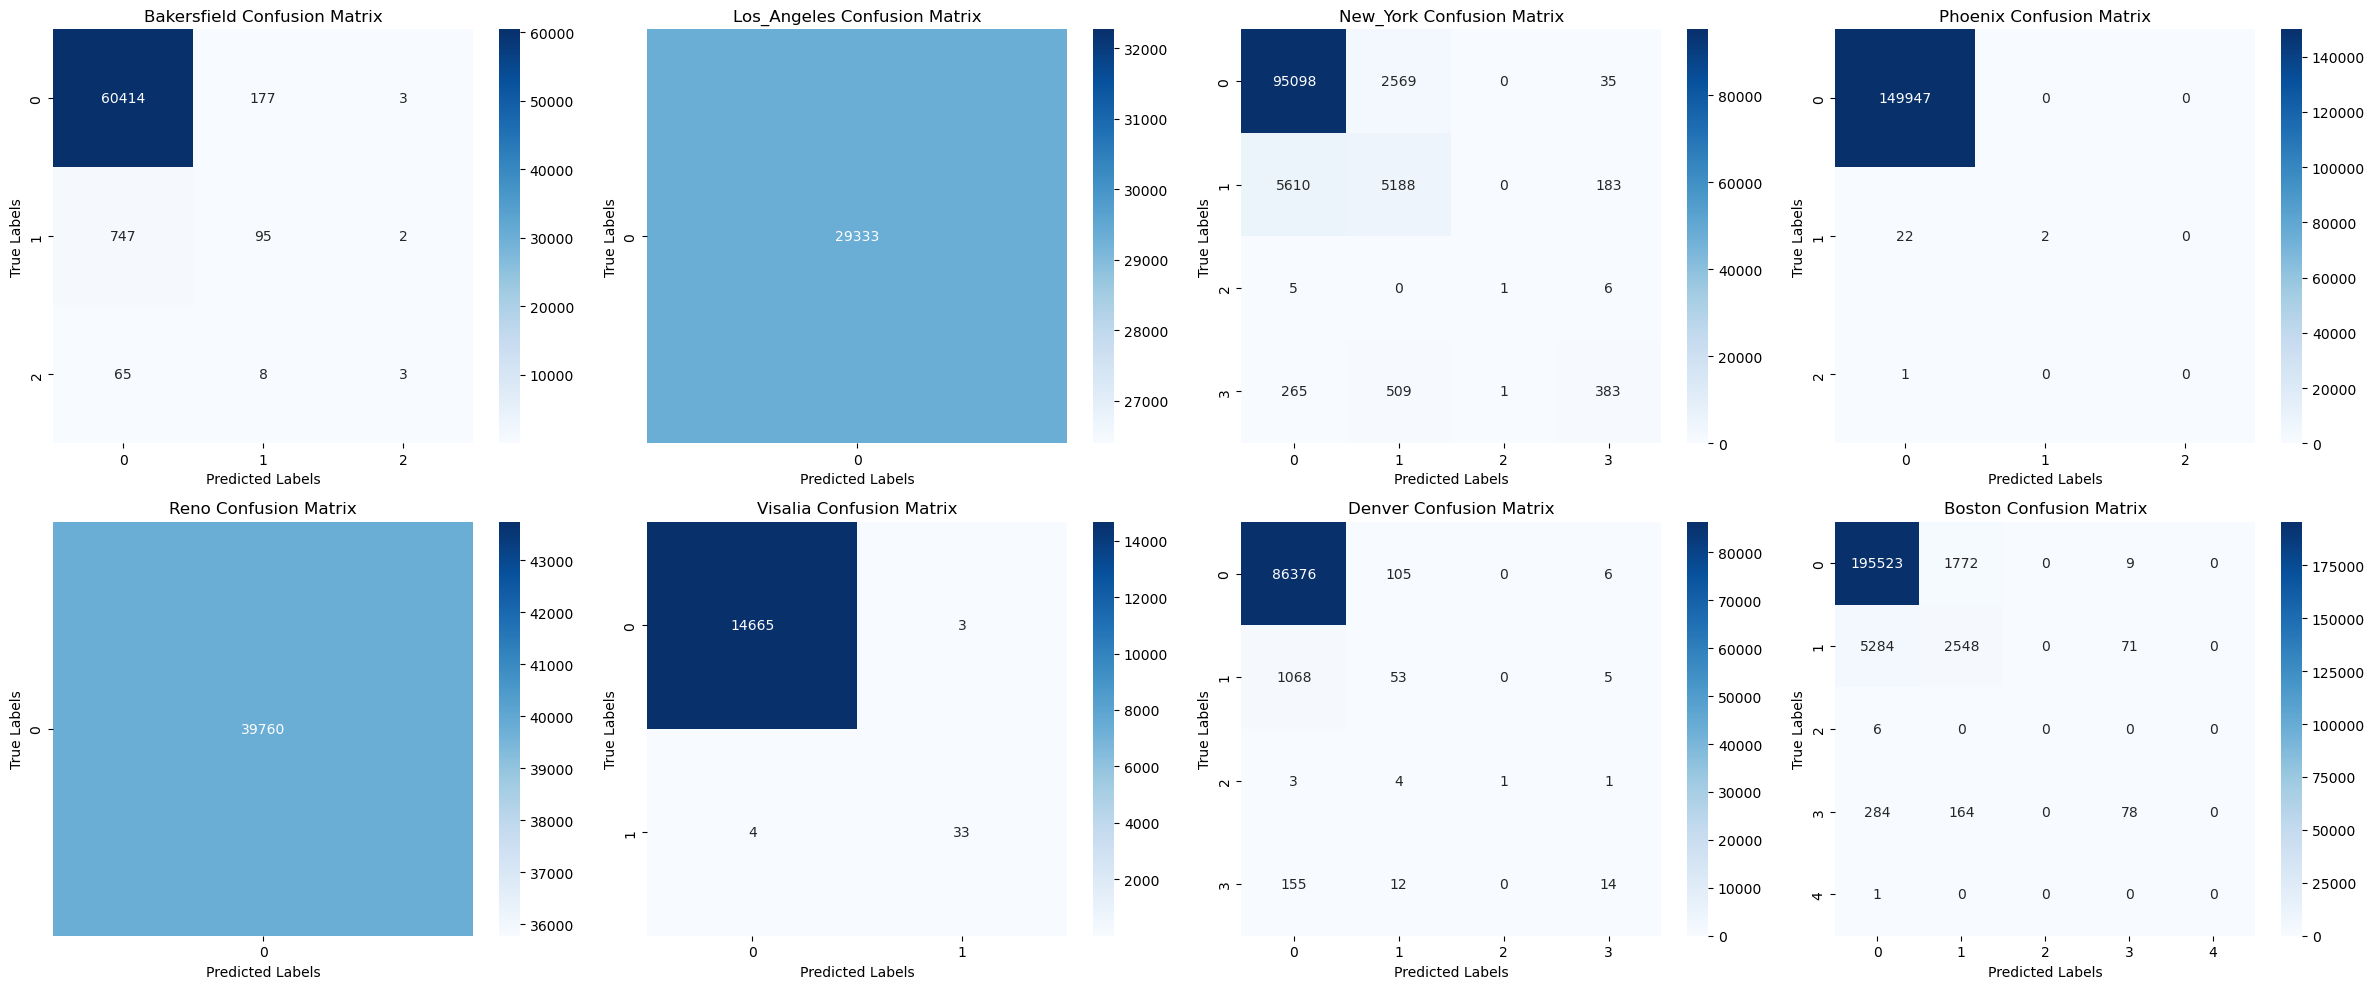

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# List of cities
cities = ['Bakersfield', 'Los_Angeles', 'New_York', 'Phoenix', 'Reno', 'Visalia', 'Denver', 'Boston']

def parse_confusion_matrix(file_path):
    confusion_matrix = []
    with open(file_path, 'r') as file:
        in_matrix_section = False
        for line in file:
            if 'Confusion Matrix:' in line:
                in_matrix_section = True
                continue
            if in_matrix_section:
                if line.strip() == '':
                    break
                # Parse the numeric values using regex
                numbers = re.findall(r'\d+', line)
                if numbers:
                    confusion_matrix.append(list(map(int, numbers)))
    return np.array(confusion_matrix)

# Initialize a plot grid
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 10))  # Adjust the grid size according to the number of cities
axes = axes.flatten()

for i, city in enumerate(cities):
    file_path = f'results/knn/knn_results_{city}.txt'  # Construct file path for each city's results
    cm = parse_confusion_matrix(file_path)
    
    # Plotting the confusion matrix for each city
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{city} Confusion Matrix')
    axes[i].set_xlabel('Predicted Labels')
    axes[i].set_ylabel('True Labels')

plt.tight_layout()
plt.show()


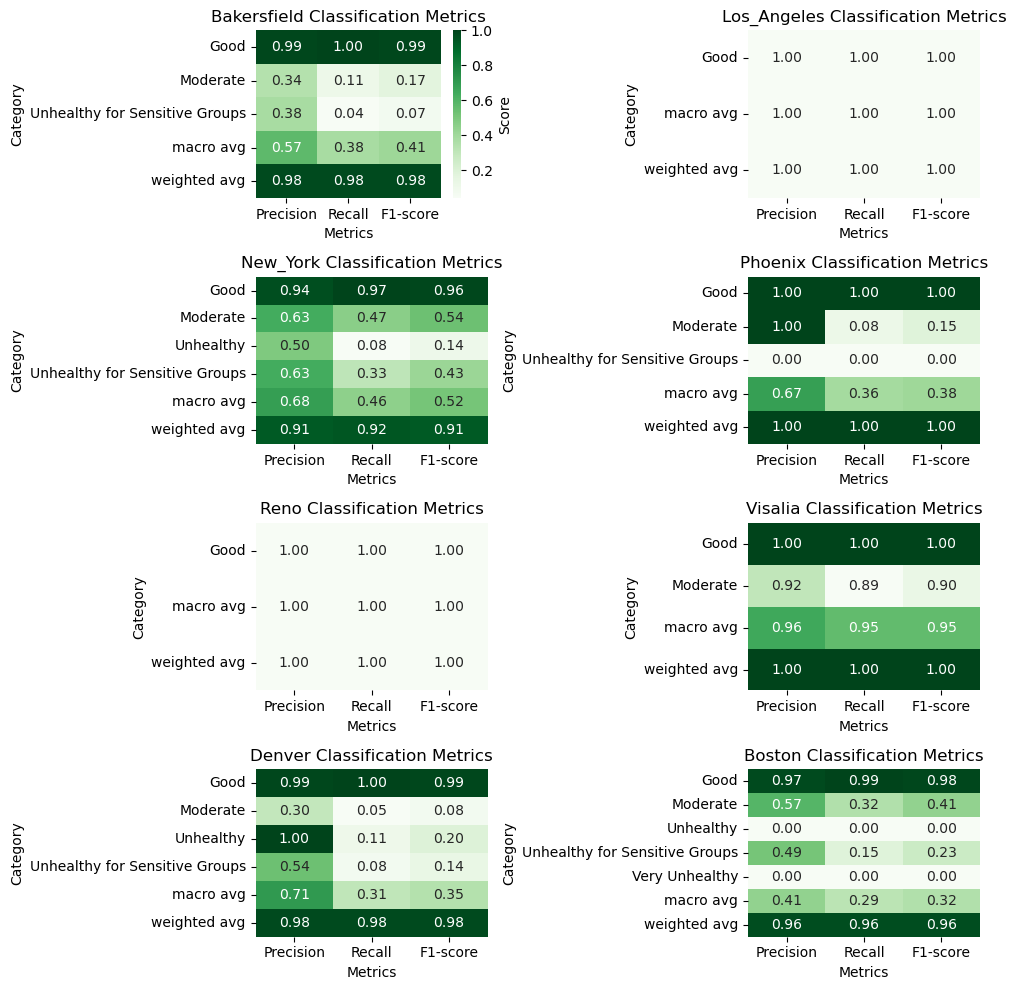

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of cities
cities = ['Bakersfield', 'Los_Angeles', 'New_York', 'Phoenix', 'Reno', 'Visalia', 'Denver', 'Boston']

def parse_classification_report(file_path):
    data = {
        'Class': [],
        'Precision': [],
        'Recall': [],
        'F1-score': []
    }
    in_report_section = False
    with open(file_path, 'r') as file:
        for line in file:
            if 'Classification Report:' in line:
                in_report_section = True
            elif in_report_section:
                if line.strip() == '':
                    continue
                parts = line.split()
                if len(parts) >= 5:  # To ensure it's a line with metrics
                    class_name = ' '.join(parts[:-4])
                    data['Class'].append(class_name)
                    data['Precision'].append(float(parts[-4]))
                    data['Recall'].append(float(parts[-3]))
                    data['F1-score'].append(float(parts[-2]))
    return pd.DataFrame(data)

# Initialize a plot grid
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))  # Adjust the grid size according to the number of cities
axes = axes.flatten()

for i, city in enumerate(cities):
    file_path = f'results/knn/knn_results_{city}.txt'  # Construct file path for each city's results
    df = parse_classification_report(file_path)
    df.set_index('Class', inplace=True)
    
    # Plotting the metrics for each city
    sns.heatmap(df, annot=True, fmt=".2f", cmap='Greens', ax=axes[i], cbar=i == 0,
                cbar_kws={'label': 'Score'})
    axes[i].set_title(f'{city} Classification Metrics')
    axes[i].set_xlabel('Metrics')
    axes[i].set_ylabel('Category')

plt.tight_layout()
plt.show()

